In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('./IBM_data_processed.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


ước cụ thể trong quy trình, hãy cho tôi biết!

#### **Câu hỏi:**  "Trong các nhóm nhân viên được phân loại theo trình độ học vấn (`Education Level`), mức độ đào tạo `(TrainingTimesLastYear`) và các cơ hội phát triển `(StockOptionLevel`) được phân bổ như thế nào, và những yếu tố này có ảnh hưởng ra sao đến tỷ lệ nghỉ việc của công ty?"

**Mục tiêu:**  
- Xác định mối quan hệ giữa trình độ học vấn và số lần đào tạo, quyền chọn cổ phiếu.
- Đánh giá tác động của việc đào tạo và cơ hội phát triển đến số năm gắn bó với công ty.
- Tìm hiểu liệu công ty có đang tập trung đào tạo và phát triển cho một số nhóm trình độ học vấn nhất định, từ đó đề xuất chiến lược phát triển nhân sự. sự hợ sự để tăng cường sự gắn bó.

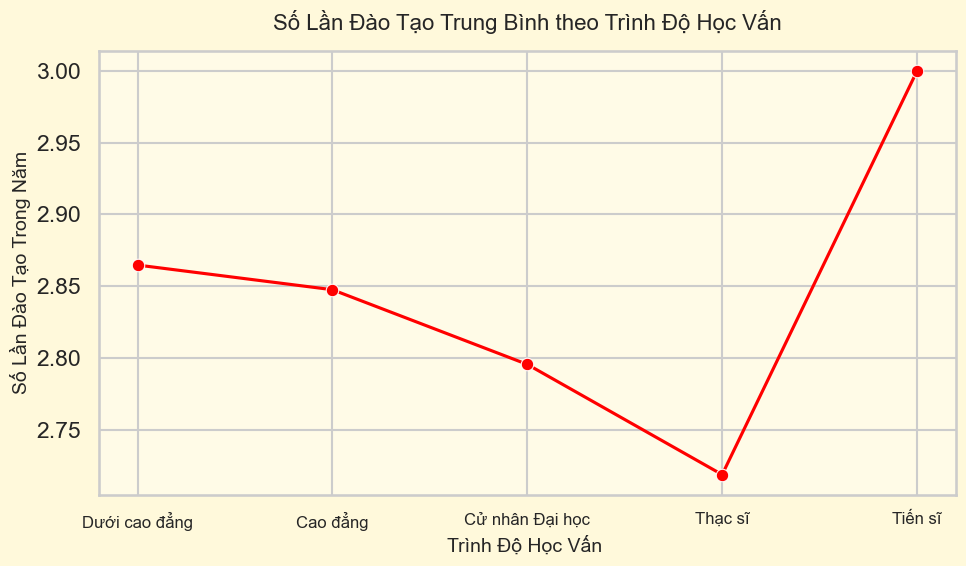

In [3]:
# Tính trung bình số lần đào tạo theo trình độ học vấn
edu_mean = df.groupby('Education', as_index=False)['TrainingTimesLastYear'].mean()

# Thiết lập style
sns.set_style("whitegrid")
sns.set_context("talk")

# Tạo figure với nền màu vàng nhạt
fig = plt.figure(figsize=(10,6), facecolor='#fff9db')  # màu nền figure
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('#fffbe7')  # màu nền axes

# Vẽ lineplot với line màu đỏ
sns.lineplot(x='Education', y='TrainingTimesLastYear', data=edu_mean, 
             marker='o', color='red', ax=ax)

# Đặt tiêu đề và nhãn
plt.title('Số Lần Đào Tạo Trung Bình theo Trình Độ Học Vấn', fontsize=16, pad=15)
plt.xlabel('Trình Độ Học Vấn ', fontsize=14)
plt.ylabel('Số Lần Đào Tạo Trong Năm', fontsize=14)

# Tùy chỉnh nhãn trục x
plt.xticks([1,2,3,4,5],
           ["Dưới cao đẳng", "Cao đẳng", "Cử nhân Đại học", "Thạc sĩ", "Tiến sĩ"],
           rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

**Nhận xét về biểu đồ:**

1. **Xu hướng chung:**  
   Biểu đồ thể hiện số lần đào tạo trung bình trong năm theo trình độ học vấn. Nhìn chung, từ "Dưới cao đẳng" đến "Thạc sĩ", số lần đào tạo trung bình giảm nhẹ. Điều này cho thấy ở các bậc học từ thấp đến tương đối cao (Thạc sĩ), số lần đào tạo không tăng lên, thậm chí có xu hướng giảm dần.

2. **Điểm đột phá ở trình độ Tiến sĩ:**  
   Khi đến bậc Tiến sĩ, số lần đào tạo trung bình tăng vọt rõ rệt. Điều này có thể ngụ ý rằng công ty đầu tư mạnh mẽ hơn vào đào tạo cho nhóm nhân viên có trình độ học vấn cao nhất, hoặc nhóm này có yêu cầu/đòi hỏi chuyên môn cao hơn, nên được tham gia nhiều khóa đào tạo chuyên sâu.

3. **Khoảng biến động nhỏ trừ đột biến ở Tiến sĩ:**  
   Mức đào tạo trung bình giữa các bậc học từ Dưới cao đẳng đến Thạc sĩ khá gần nhau (dao động nhẹ quanh 2.75 - 2.85), cho thấy sự khác biệt không quá lớn trong chính sách đào tạo cho các nhóm nhân viên này. Tuy nhiên, sự chênh lệch lớn khi bước lên bậc Tiến sĩ rất đáng chú ý.

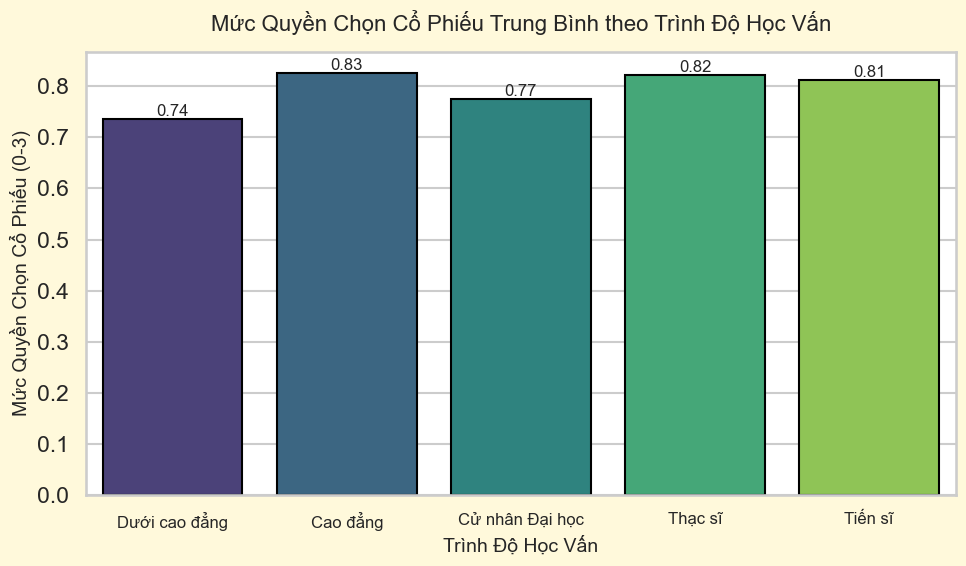

In [4]:
# Tính trung bình StockOptionLevel theo Education
edu_stock_mean = df.groupby('Education', as_index=False)['StockOptionLevel'].mean()

# Thiết lập style và context
sns.set_style("whitegrid")
sns.set_context("talk")

# Vẽ biểu đồ cột với bảng màu magma
plt.figure(figsize=(10, 6), facecolor='#fff9db')
ax = sns.barplot(x='Education', y='StockOptionLevel', data=edu_stock_mean,
                 palette=sns.color_palette("viridis", len(edu_stock_mean)), edgecolor='black')

# Đặt tiêu đề và nhãn
plt.title('Mức Quyền Chọn Cổ Phiếu Trung Bình theo Trình Độ Học Vấn', fontsize=16, pad=15)
plt.xlabel('Trình Độ Học Vấn', fontsize=14)
plt.ylabel('Mức Quyền Chọn Cổ Phiếu (0-3)', fontsize=14)

# Tùy chỉnh nhãn trục x
plt.xticks([0, 1, 2, 3, 4],
           ["Dưới cao đẳng", "Cao đẳng", "Cử nhân Đại học", "Thạc sĩ", "Tiến sĩ"],
           rotation=0, fontsize=12)

# Hiển thị giá trị trung bình trên đầu mỗi cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


**Nhận xét:**

Biểu đồ thể hiện mức quyền chọn cổ phiếu trung bình phân theo trình độ học vấn, cho thấy các giá trị nằm trong khoảng từ 0.74 đến 0.83 – nghĩa là sự khác biệt giữa các nhóm không quá lớn. Cụ thể:

- Nhóm "Dưới cao đẳng" có mức trung bình thấp nhất, khoảng 0.74.
- Nhóm "Cao đẳng" có mức trung bình cao nhất, khoảng 0.83.
- Các nhóm "Cử nhân Đại học", "Thạc sĩ" và "Tiến sĩ" dao động ở mức trung bình từ 0.77 đến 0.82.

Sự chênh lệch chưa đến 0.1 giữa nhóm thấp nhất và cao nhất cho thấy công ty áp dụng chính sách quyền chọn cổ phiếu khá đồng đều giữa các mức trình độ học vấn. Không có nhóm nào được ưu ái vượt trội, cũng như không có nhóm nào bị thiệt thòi đáng kể.

Điều này có thể được hiểu rằng việc phân bổ quyền chọn cổ phiếu không tập trung mạnh vào nhóm nhân viên có trình độ quá cao hay quá thấp, mà tương đối đồng đều. Tuy nhiên, cũng có một chút đáng chú ý là nhóm "Cao đẳng" – tức không phải bậc học cao nhất – lại đang có mức trung bình quyền chọn cổ phiếu nhỉnh hơn so với bậc "Tiến sĩ" hay "Cử nhân Đại học". Điều đó gợi ý rằng công ty có thể đang áp dụng tiêu chí phân bổ quyền chọn cổ phiếu dựa trên các yếu tố khác (như vai trò công việc, thâm niên hoặc hiệu suất) thay vì dựa chủ yếu vào trình độ học vấn.

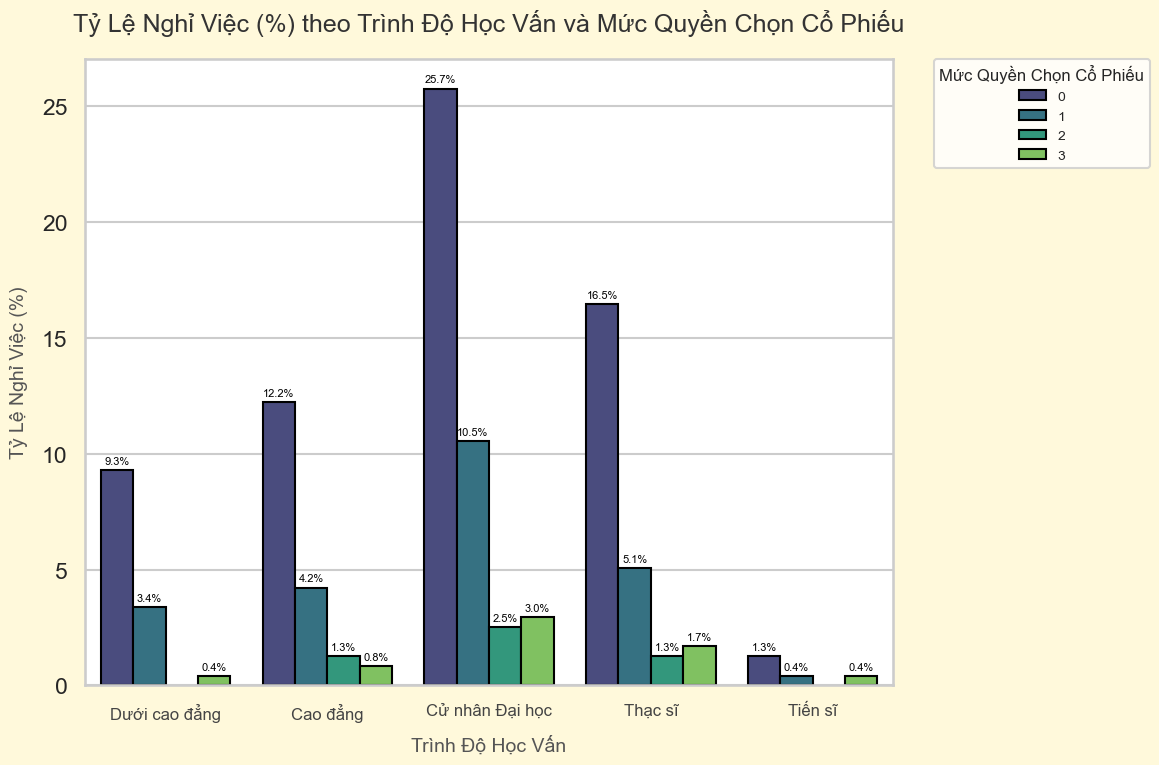

In [5]:
df_quit = df[df['Attrition'] == 'Yes']
# Tổng số nhân viên nghỉ việc
total_quit = len(df_quit)

# Đếm số nhân viên nghỉ việc theo Education và StockOptionLevel
attrition_counts = df_quit.groupby(['Education', 'StockOptionLevel']).size().reset_index(name='Count')

# Tính tỷ lệ nghỉ việc dựa trên tổng số nhân viên nghỉ việc
attrition_counts['AttritionRate'] = (attrition_counts['Count'] / total_quit) * 100

# Vẽ biểu đồ
plt.figure(figsize=(12, 8), facecolor='#fff9db')  # Màu nền biểu đồ
ax = sns.barplot(
    x='Education', y='AttritionRate', hue='StockOptionLevel', data=attrition_counts,
    palette=sns.color_palette("viridis", n_colors=attrition_counts['StockOptionLevel'].nunique()), 
    edgecolor='black', ci=None  # Không hiển thị thanh sai số
)

# Tiêu đề và nhãn
plt.title('Tỷ Lệ Nghỉ Việc (%) theo Trình Độ Học Vấn và Mức Quyền Chọn Cổ Phiếu', 
          fontsize=18, pad=20, color='#333333')
plt.xlabel('Trình Độ Học Vấn', fontsize=14, labelpad=10, color='#555555')
plt.ylabel('Tỷ Lệ Nghỉ Việc (%)', fontsize=14, labelpad=10, color='#555555')

# Tùy chỉnh trục x
plt.xticks([0, 1, 2, 3, 4], 
           ["Dưới cao đẳng", "Cao đẳng", "Cử nhân Đại học", "Thạc sĩ", "Tiến sĩ"],
           rotation=0, fontsize=12, color='#444444')

# Tùy chỉnh chú giải
plt.legend(title='Mức Quyền Chọn Cổ Phiếu', title_fontsize=12, fontsize=10, 
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True)

# Hiển thị giá trị trên cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=8, color='black')

# Tăng khoảng cách giữa các phần tử
plt.tight_layout()

plt.show()


### **Nhận xét biểu đồ "Tỷ Lệ Nghỉ Việc (%) theo Trình Độ Học Vấn và Mức Quyền Chọn Cổ Phiếu"**

1. **Nhóm nhân viên có quyền chọn cổ phiếu thấp nhất (StockOptionLevel = 0):**
   - Nhóm này chiếm tỷ lệ nghỉ việc cao nhất ở hầu hết các trình độ học vấn.
   - Đặc biệt, nhóm **Cử nhân Đại học** có tỷ lệ nghỉ việc lên đến **25.7%**, cao hơn đáng kể so với các nhóm trình độ khác. 
   - Nhóm **Thạc sĩ** cũng có tỷ lệ nghỉ việc cao đáng kể là **16.5%**, phản ánh mức độ bất mãn khi không có quyền chọn cổ phiếu.

2. **Nhóm nhân viên có quyền chọn cổ phiếu trung bình (StockOptionLevel = 1):**
   - Tỷ lệ nghỉ việc giảm rõ rệt khi so sánh với nhóm **StockOptionLevel = 0**, nhưng vẫn còn ở mức cao đối với **Cử nhân Đại học (10.5%)** và **Thạc sĩ (5.1%)**.
   - Điều này cho thấy quyền chọn cổ phiếu ở mức trung bình chưa đủ để giảm thiểu đáng kể tỷ lệ nghỉ việc, đặc biệt ở nhóm nhân viên có trình độ cao.

3. **Nhóm nhân viên có quyền chọn cổ phiếu cao hơn (StockOptionLevel = 2, 3):**
   - Tỷ lệ nghỉ việc giảm xuống mức rất thấp ở hầu hết các trình độ học vấn.
   - Đáng chú ý, nhóm **StockOptionLevel = 3** gần như không có nhân viên nghỉ việc, đặc biệt ở các nhóm **Dưới Cao đẳng**, **Cao đẳng**, và **Tiến sĩ**.
   - Nhóm **Cử nhân Đại học** và **Thạc sĩ** vẫn có tỷ lệ nghỉ việc thấp hơn nhiều (dưới 3%).

4. **So sánh giữa các trình độ học vấn:**
   - **Cử nhân Đại học** có tỷ lệ nghỉ việc cao nhất ở tất cả các mức quyền chọn cổ phiếu, cho thấy đây là nhóm nhân viên dễ chịu ảnh hưởng nhất từ sự bất mãn về cơ hội phát triển.
   - **Thạc sĩ** cũng có tỷ lệ nghỉ việc tương đối cao, đặc biệt khi quyền chọn cổ phiếu không đủ hấp dẫn (StockOptionLevel = 0, 1).
   - **Tiến sĩ** và **Dưới Cao đẳng** là hai nhóm có tỷ lệ nghỉ việc thấp nhất, cho thấy họ ít bị tác động bởi các yếu tố quyền chọn cổ phiếu hoặc đã có những kỳ vọng thấp hơn về phúc lợi.

5. **Tổng quan:**
   - Quyền chọn cổ phiếu rõ ràng là yếu tố quan trọng trong việc giữ chân nhân viên, đặc biệt là nhóm nhân viên có trình độ học vấn từ **Cử nhân Đại học** trở lên.
   - Cần chú trọng tăng cường quyền chọn cổ phiếu hoặc các chính sách phát triển cho nhóm **Cử nhân Đại học** và **Thạc sĩ** để giảm tỷ lệ nghỉ việc. 

--- 
**Đề xuất:** 
- Nâng cấp các chính sách phúc lợi, đặc biệt là quyền chọn cổ phiếu, cho các nhóm nhân viên có trình độ **Cử nhân Đại học** và **Thạc sĩ**.
- Kết hợp quyền chọn cổ phiếu với các cơ hội phát triển nghề nghiệp và đào tạo để tăng mức độ gắn bó của nhân viên.

### **Câu hỏi:**
"Liệu tình trạng làm thêm giờ và sự cân bằng công việc - cuộc sống trong các phòng ban có ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên không?"

---

### **Mục tiêu:**
Đánh giá tác động của tình trạng làm thêm giờ (Overtime) và mức độ cân bằng công việc - cuộc sống (Work-Life Balance) trong các phòng ban đến tỷ lệ nghỉ việc của nhân viên. Từ đó, đề xuất giải pháp cải thiện môi trường làm việc, giảm áp lực và tăng sự gắn bó.


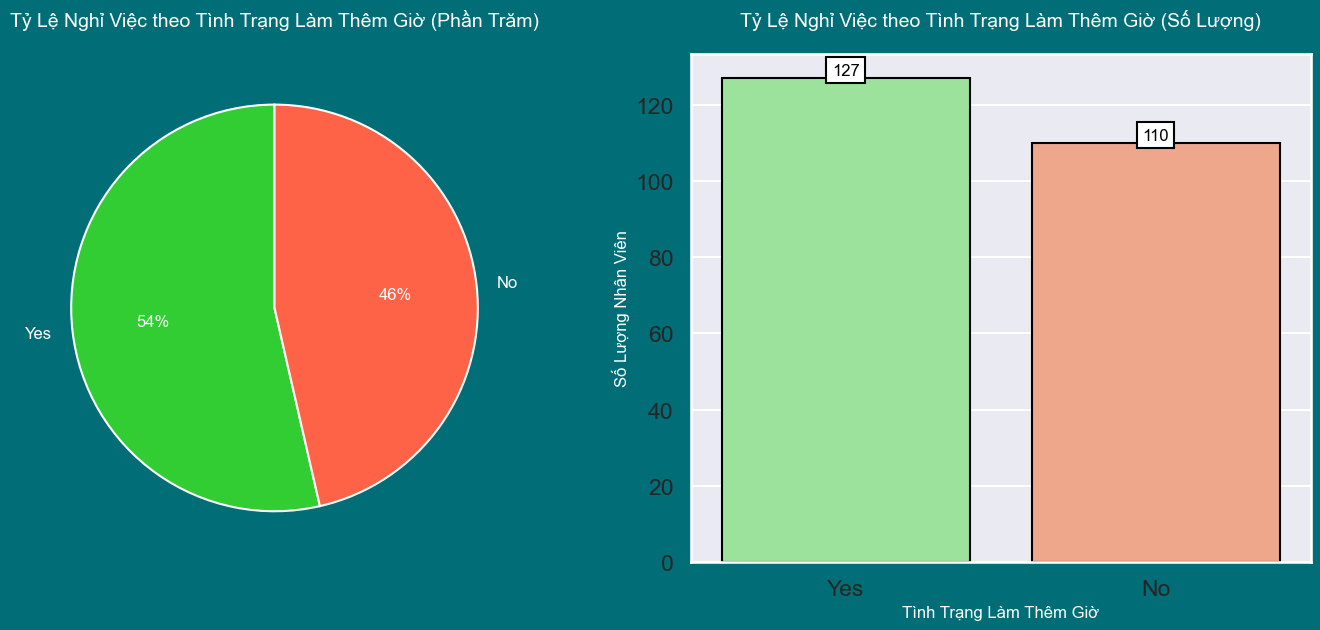

In [6]:


# Tính số liệu cho OverTime
overtime_data = df[df['Attrition'] == 'Yes']['OverTime'].value_counts().reset_index()
overtime_data.columns = ['OverTime', 'Count']
total_count = overtime_data['Count'].sum()
overtime_data['Percentage'] = (overtime_data['Count'] / total_count) * 100

# Thiết lập style
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7), facecolor='#006d77')  # Màu nền xanh

# Biểu đồ 1: Pie chart (Phần trăm)
plt.subplot(1, 2, 1)
colors = ['#32CD32', '#FF6347']  # Màu xanh lá và đỏ
plt.pie(overtime_data['Percentage'], labels=overtime_data['OverTime'], 
        autopct='%1.0f%%', startangle=90, colors=colors, textprops={'color': 'white', 'fontsize': 12})
plt.title("Tỷ Lệ Nghỉ Việc theo Tình Trạng Làm Thêm Giờ (Phần Trăm)", fontsize=14, color='white', pad=20)

# Biểu đồ 2: Bar chart (Số lượng)
plt.subplot(1, 2, 2)
colors_bar = ['#90ee90', '#ffa07a']  # Màu xanh lá nhạt và cam nhạt
sns.barplot(x='OverTime', y='Count', data=overtime_data, palette=colors_bar, edgecolor='black')
plt.title("Tỷ Lệ Nghỉ Việc theo Tình Trạng Làm Thêm Giờ (Số Lượng)", fontsize=14, color='white', pad=20)
plt.xlabel("Tình Trạng Làm Thêm Giờ", fontsize=12, color='white')
plt.ylabel("Số Lượng Nhân Viên", fontsize=12, color='white')

# Hiển thị giá trị trên cột
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='bottom', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

# Tùy chỉnh tổng thể
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **Phân tích biểu đồ 1:**
- **Biểu đồ tròn (Pie Chart):**
  - Tỷ lệ nghỉ việc của nhân viên làm thêm giờ (**54%**) cao hơn nhân viên không làm thêm giờ (**46%**), cho thấy làm thêm giờ có thể là một yếu tố ảnh hưởng đến việc nghỉ việc.
  - Mặc dù chênh lệch không quá lớn, nhưng làm thêm giờ có thể gây áp lực và làm giảm sự hài lòng của nhân viên.

- **Biểu đồ cột (Bar Chart):**
  - Nhân viên làm thêm giờ chiếm số lượng nghỉ việc lớn hơn (**127 nhân viên**) so với nhân viên không làm thêm giờ (**110 nhân viên**).
  - Điều này cho thấy, việc làm thêm giờ có thể làm gia tăng nguy cơ nghỉ việc, đặc biệt đối với những nhân viên phải làm thêm giờ liên tục trong thời gian dài.

---

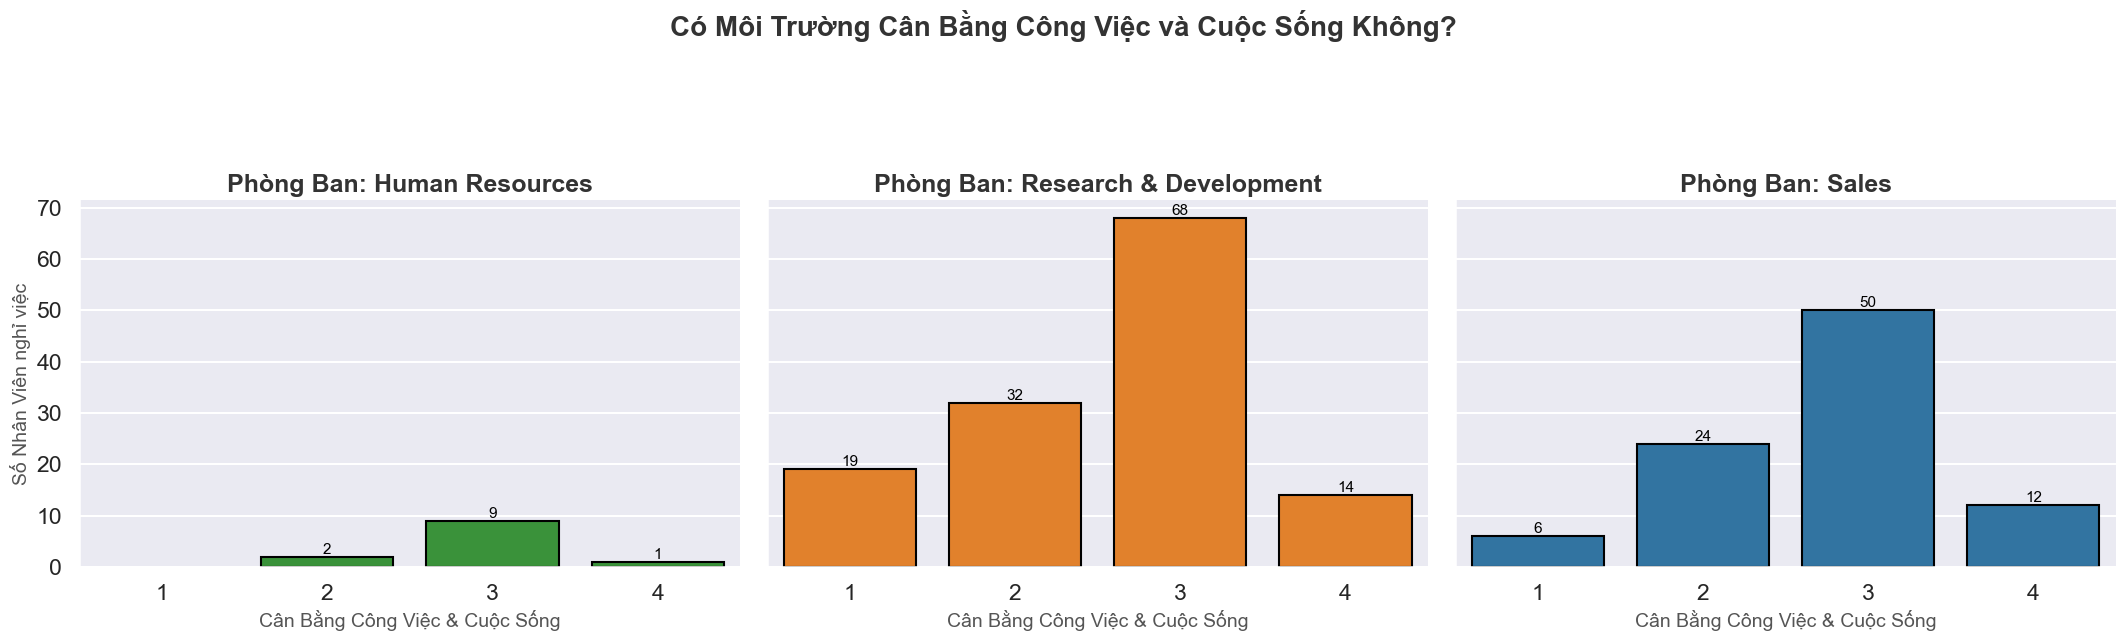

In [7]:
# Lọc dữ liệu cho nhân viên đã nghỉ việc
df_quit = df[df['Attrition'] == 'Yes']

# Đếm số nhân viên đã nghỉ việc theo Department và WorkLifeBalance
count_by_dept_wlb = df_quit.groupby(['Department', 'WorkLifeBalance']).size().reset_index(name='Count')

# Tạo danh sách màu sắc khác nhau cho từng phòng ban
department_colors = {
    'Sales': '#1f77b4',      # Xanh dương
    'Research & Development': '#ff7f0e',  # Cam
    'Human Resources': '#2ca02c'          # Xanh lá
}

# Vẽ biểu đồ với màu sắc tùy chỉnh theo Department và ẩn chú giải
g = sns.catplot(
    x='WorkLifeBalance', y='Count', col='Department', hue='Department', kind='bar', 
    data=count_by_dept_wlb, height=6, aspect=1.2, ci=None, 
    palette=department_colors, edgecolor='black', legend=False
)

# Cập nhật tiêu đề chính của toàn bộ biểu đồ
g.fig.suptitle("Có Môi Trường Cân Bằng Công Việc và Cuộc Sống Không?", y=1.08, fontsize=20, color='#333333', fontweight='bold')

# Cập nhật nhãn cho trục x và trục y
g.set_axis_labels("Cân Bằng Công Việc & Cuộc Sống", "Số Nhân Viên nghỉ việc", fontsize=14, color='#555555')
g.set_titles("Phòng Ban: {col_name}", fontsize=14, color='#333333', fontweight='bold')

# Tùy chỉnh hiển thị giá trị trên các cột
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                f"{int(height)}", 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11, color='black'
            )

# Tùy chỉnh giao diện và khoảng cách
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Điều chỉnh vị trí để tiêu đề không bị chồng
plt.show()


### Nhận Xét Biểu Đồ **"Số Nhân Viên Nghỉ Việc theo Mức Độ Cân Bằng Công Việc và Cuộc Sống tại Các Phòng Ban"**

1. **Phòng ban Human Resources**:
   - Số lượng nhân viên nghỉ việc chủ yếu tập trung ở mức **3** (Cân bằng trung bình) với **9 nhân viên**.  
   - Mức **2** (Dưới trung bình) có **2 nhân viên** và mức **4** (Rất cân bằng) chỉ có **1 nhân viên**.  
   → **Kết luận**: Phòng ban này có số lượng nghỉ việc thấp nhưng tình trạng mất cân bằng (mức 2) vẫn tồn tại.

2. **Phòng ban Research & Development**:
   - Mức **3** (Cân bằng trung bình) chiếm tỷ lệ cao nhất với **68 nhân viên** nghỉ việc.  
   - Mức **2** (Dưới trung bình) có **32 nhân viên**, cho thấy áp lực công việc còn khá lớn.  
   - Mức **4** (Rất cân bằng) có **14 nhân viên**, phản ánh một bộ phận nhỏ hài lòng về cân bằng công việc.  
   → **Kết luận**: Đây là phòng ban có số lượng nhân viên nghỉ việc lớn nhất và mức độ cân bằng công việc - cuộc sống vẫn còn nhiều hạn chế.

3. **Phòng ban Sales**:
   - Nhân viên nghỉ việc chủ yếu ở mức **3** (Cân bằng trung bình) với **50 nhân viên**.  
   - Mức **2** (Dưới trung bình) có **24 nhân viên** và mức **4** (Rất cân bằng) có **12 nhân viên**.  
   → **Kết luận**: Phòng Sales có sự cân bằng tương đối nhưng vẫn còn một nhóm lớn nhân viên cảm thấy mất cân bằng (mức 2).

### **Tổng Kết**:
- Tình trạng cân bằng công việc và cuộc sống ở mức trung bình (**mức 3**) chiếm ưu thế trong cả 3 phòng ban.
- Phòng **Research & Development** có số lượng nghỉ việc cao nhất, đặc biệt ở mức mất cân bằng (**mức 2**), phản ánh áp lực công việc lớn.
- Phòng **Human Resources** có tình trạng nghỉ việc thấp nhất nhưng lại thiếu sự hài lòng cao về cân bằng công việc.  
- Phòng **Sales** cần cải thiện Work-Life Balance để giảm tình trạng nghỉ việc ở nhóm mất cân bằng.

---

### **Kết luận tổng hợp:**
- **Tình trạng làm thêm giờ** rõ ràng làm gia tăng nguy cơ nghỉ việc, đặc biệt ở những nhân viên chịu áp lực cao từ công việc.
- **Phòng "Research & Development"** và **Sales** cần được quan tâm hơn trong việc cải thiện Work-Life Balance để giảm tỷ lệ nghỉ việc.
- **Đề xuất**:
   - Giảm bớt khối lượng làm thêm giờ.
   - Cải thiện chính sách hỗ trợ cân bằng công việc và cuộc sống, đặc biệt cho các phòng ban có tỷ lệ nghỉ việc cao.có tỷ lệ nghỉ việc cao.ork-Life Balance thấp như **Human Resources** và **Sales**.

### Câu hỏi:
- **Khoảng cách từ nơi làm việc và tần suất đi công tác có phải là yếu tố chính dẫn đến tình trạng nghỉ việc hay không?**

### Mục tiêu:
- Phân tích mối liên hệ giữa khoảng cách từ nơi làm việc và tần suất đi công tác với tình trạng nghỉ việc.
- Đánh giá xem các yếu tố trên có ảnh hưởng đáng kể đến quyết định nghỉ việc của nhân viên hay không để giảm tỷ lệ nghỉ việc.việc.

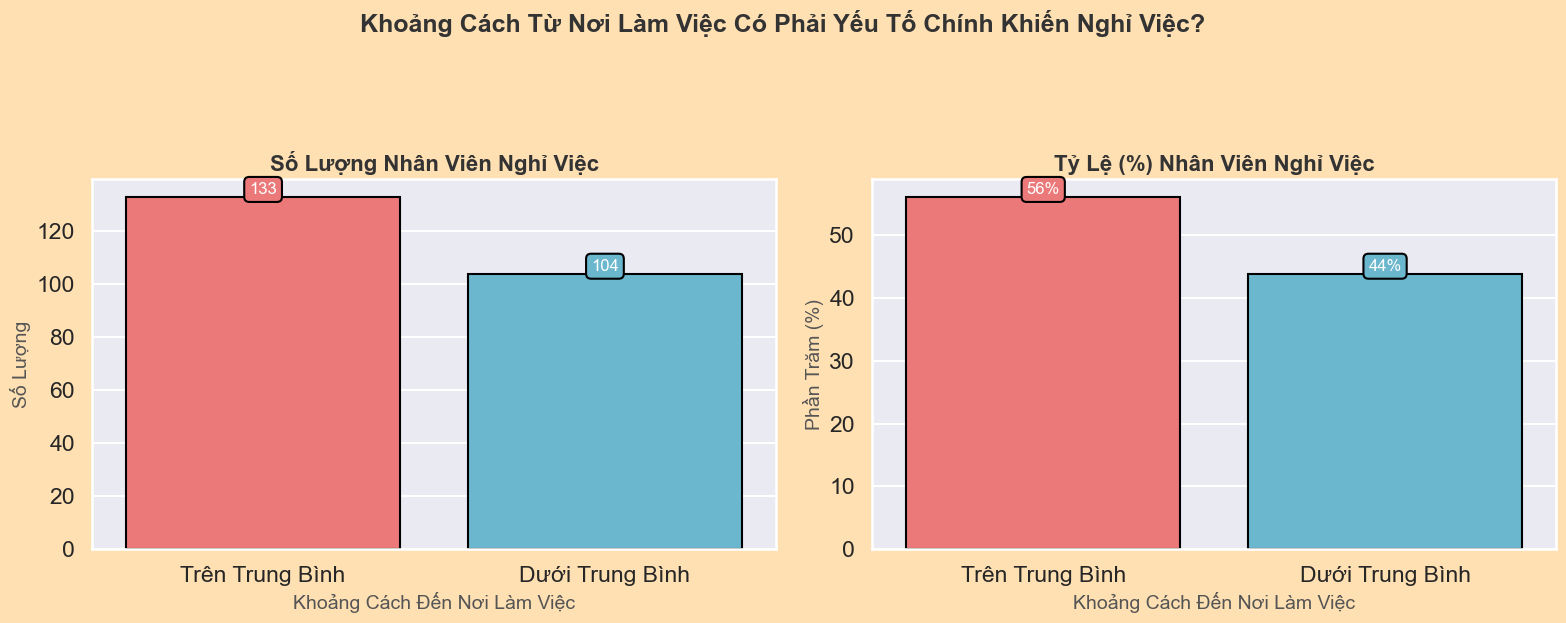

In [8]:
# Tính trung bình khoảng cách
avg_distance = df['DistanceFromHome'].mean()
df['Khoảng cách'] = df['DistanceFromHome'].apply(lambda x: 'Trên Trung Bình' if x < avg_distance else 'Dưới Trung Bình')

# Đếm số nhân viên nghỉ việc theo Khoảng cách
count_by_distance = df[df['Attrition'] == 'Yes']['Khoảng cách'].value_counts().reset_index()
count_by_distance.columns = ['Khoảng cách', 'Số lượng']

# Tính phần trăm
total_quit = count_by_distance['Số lượng'].sum()
count_by_distance['Phần trăm (%)'] = (count_by_distance['Số lượng'] / total_quit) * 100

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=(16, 6), facecolor='#ffe0b2')  # Màu nền vàng nhạt
fig.suptitle("Khoảng Cách Từ Nơi Làm Việc Có Phải Yếu Tố Chính Khiến Nghỉ Việc?", 
             fontsize=18, y=1.05, fontweight='bold', color='#333333')

# Biểu đồ số lượng
sns.barplot(x='Khoảng cách', y='Số lượng', data=count_by_distance, ax=ax[0], 
            palette=['#ff6666', '#5bc0de'], edgecolor='black')  # Màu đỏ và xanh
ax[0].set_title('Số Lượng Nhân Viên Nghỉ Việc', fontsize=16, color='#333333', fontweight='bold')
ax[0].set_xlabel('Khoảng Cách Đến Nơi Làm Việc', fontsize=14, color='#555555')
ax[0].set_ylabel('Số Lượng', fontsize=14, color='#555555')

for p in ax[0].patches:
    height = p.get_height()
    ax[0].annotate(f"{int(height)}", 
                   (p.get_x() + p.get_width() / 2, height), 
                   ha='center', va='bottom', fontsize=12, color='white',
                   bbox=dict(facecolor=p.get_facecolor(), edgecolor='black', boxstyle='round,pad=0.3'))

# Biểu đồ phần trăm
sns.barplot(x='Khoảng cách', y='Phần trăm (%)', data=count_by_distance, ax=ax[1], 
            palette=['#ff6666', '#5bc0de'], edgecolor='black')  # Màu đỏ và xanh
ax[1].set_title('Tỷ Lệ (%) Nhân Viên Nghỉ Việc', fontsize=16, color='#333333', fontweight='bold')
ax[1].set_xlabel('Khoảng Cách Đến Nơi Làm Việc', fontsize=14, color='#555555')
ax[1].set_ylabel('Phần Trăm (%)', fontsize=14, color='#555555')

for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f"{height:.0f}%", 
                   (p.get_x() + p.get_width() / 2, height), 
                   ha='center', va='bottom', fontsize=12, color='white',
                   bbox=dict(facecolor=p.get_facecolor(), edgecolor='black', boxstyle='round,pad=0.3'))

# Tinh chỉnh bố cục
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 1. **Biểu đồ 1: Khoảng cách từ nơi làm việc**
- **Số lượng nhân viên nghỉ việc:**
  - Những người sống **trên trung bình** về khoảng cách từ nơi làm việc có **133 người nghỉ việc**, cao hơn so với **104 người** ở dưới trung bình.
- **Tỷ lệ nhân viên nghỉ việc:**
  - **56%** nhân viên sống xa nơi làm việc trên trung bình nghỉ việc, cao hơn so với **44%** nhân viên ở gần nơi làm việc dưới trung bình.

**Kết luận:** Khoảng cách đến nơi làm việc có vẻ là một yếu tố quan trọng, vì tỷ lệ nghỉ việc cao hơn ở nhóm có khoảng cách xa. Điều này có thể liên quan đến chi phí di chuyển, thời gian đi lại, và sự cân bằng giữa công việc và cuộc sống.


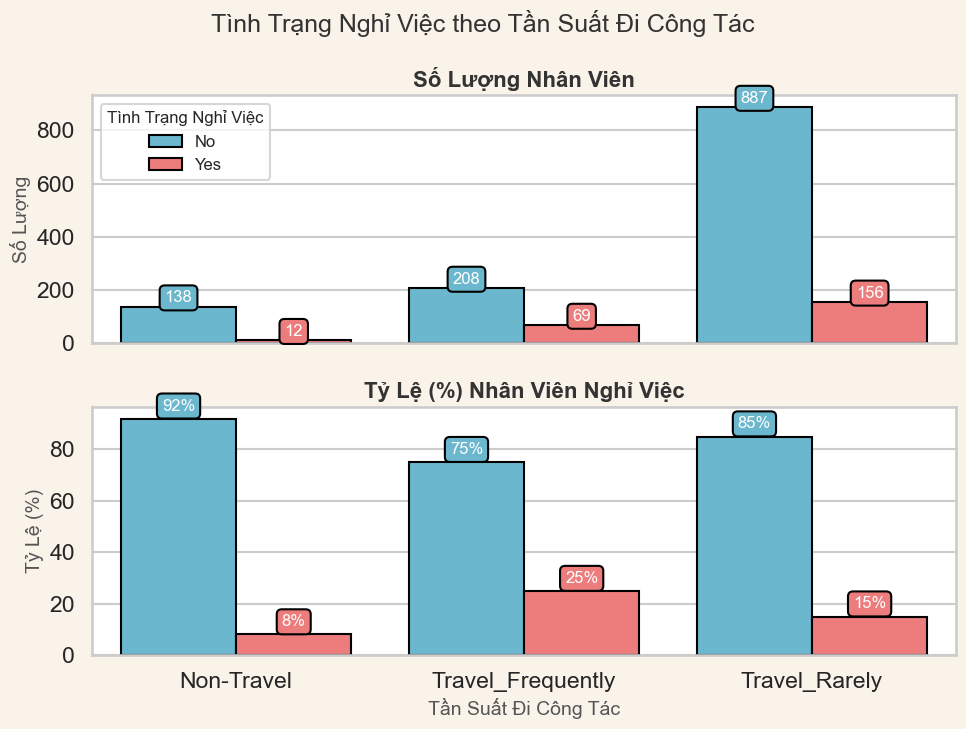

In [9]:
# Đếm số lượng Attrition theo BusinessTravel
count_data = df.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Số lượng')

# Tính phần trăm cho từng nhóm BusinessTravel
total_counts = count_data.groupby('BusinessTravel')['Số lượng'].transform('sum')
count_data['Phần trăm (%)'] = (count_data['Số lượng'] / total_counts) * 100

# Thiết lập style
sns.set_style("whitegrid")
sns.set_context("talk")

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True, facecolor='#f9f3e9')
fig.suptitle("Tình Trạng Nghỉ Việc theo Tần Suất Đi Công Tác", fontsize=18, y=0.92, color='#333333')

# Biểu đồ 1: Số lượng
sns.barplot(x='BusinessTravel', y='Số lượng', hue='Attrition', data=count_data, ax=axes[0],
            palette=['#5bc0de', '#ff6b6b'], edgecolor='black')  # Màu xanh và đỏ
axes[0].set_title("Số Lượng Nhân Viên", fontsize=16, color='#333333', fontweight='bold')
axes[0].set_ylabel("Số Lượng", fontsize=14, color='#555555')
axes[0].set_xlabel("")
axes[0].legend(title="Tình Trạng Nghỉ Việc", fontsize=12, title_fontsize=12)

# Hiển thị giá trị trên cột (Số lượng) với bbox
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:
        axes[0].annotate(f"{int(height)}", 
                         (p.get_x() + p.get_width() / 2, height + 5), 
                         ha='center', va='bottom', fontsize=12, color='white',
                         bbox=dict(facecolor=p.get_facecolor(), edgecolor='black', boxstyle='round,pad=0.3'))

# Biểu đồ 2: Phần trăm
sns.barplot(x='BusinessTravel', y='Phần trăm (%)', hue='Attrition', data=count_data, ax=axes[1],
            palette=['#5bc0de', '#ff6b6b'], edgecolor='black')
axes[1].set_title("Tỷ Lệ (%) Nhân Viên Nghỉ Việc", fontsize=16, color='#333333', fontweight='bold')
axes[1].set_ylabel("Tỷ Lệ (%)", fontsize=14, color='#555555')
axes[1].set_xlabel("Tần Suất Đi Công Tác", fontsize=14, color='#555555')
axes[1].legend_.remove()

# Hiển thị giá trị trên cột (Phần trăm) với bbox
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f"{height:.0f}%", 
                         (p.get_x() + p.get_width() / 2, height + 2), 
                         ha='center', va='bottom', fontsize=12, color='white',
                         bbox=dict(facecolor=p.get_facecolor(), edgecolor='black', boxstyle='round,pad=0.3'))

# Điều chỉnh bố cục
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 2. **Biểu đồ 2: Tần suất đi công tác**
- **Số lượng nhân viên nghỉ việc:**
  - Nhóm **không đi công tác (Non-Travel):** Chỉ có **12 nhân viên nghỉ việc** trong tổng số 150 người (tỷ lệ thấp).
  - Nhóm **đi công tác thường xuyên (Travel Frequently):** **69 nhân viên nghỉ việc** (tỷ lệ nghỉ việc cao nhất).
  - Nhóm **thỉnh thoảng đi công tác (Travel Rarely):** **156 nhân viên nghỉ việc**, chiếm số lượng cao nhất về số lượng tuyệt đối.
- **Tỷ lệ nhân viên nghỉ việc:**
  - Nhóm **không đi công tác:** Tỷ lệ nghỉ việc chỉ **8%**, thấp hơn nhiều so với nhóm **đi công tác thường xuyên (25%)** và nhóm **đi công tác ít (15%)**.

**Kết luận:** Tần suất đi công tác có tác động đáng kể đến tình trạng nghỉ việc. Nhân viên phải đi công tác thường xuyên hoặc thỉnh thoảng có xu hướng nghỉ việc cao hơn, có thể do áp lực công việc, mất cân bằng cuộc sống, hoặc ảnh hưởng từ việc di chuyển nhiều.

---




### Tổng kết:
- **Khoảng cách từ nơi làm việc** và **tần suất đi công tác** đều có tác động đáng kể đến tình trạng nghỉ việc. 
- Các công ty nên:
  1. Xem xét hỗ trợ chi phí đi lại hoặc cung cấp chỗ ở gần cho nhân viên ở xa để giảm tỷ lệ nghỉ việc.
  2. Đánh giá lại tần suất đi công tác, giảm bớt công tác không cần thiết hoặc hỗ trợ nhân viên trong việc sắp xếp công việc khi công tác.

Cả hai yếu tố này đều nhấn mạnh tầm quan trọng của việc duy trì **môi trường làm việc thuận lợi và cân bằng** để giảm tỷ lệ nghỉ việc.